{'00': 502, '11': 498}


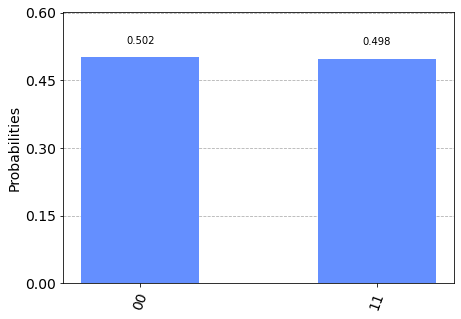

In [17]:
#Permite la ejecución de "multiple-shot" de circuitos, tanto ideales como ruidosos. El backend de QasmSimulator
#está diseñado para imitar un dispositivo real. Ejecuta un Qiskit QuantumCircuit y devuelve el conteo
#con los valores finales. El circuito puede contener puertas, medidas, restablecimientos, condicionales
#y otras opciones avanzadas de simulador

import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)



{'00': 1}
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


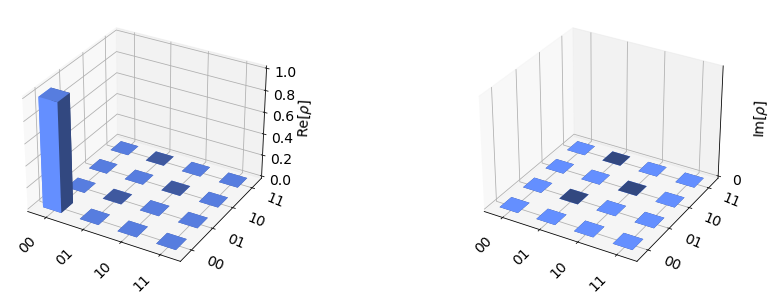

In [23]:
#Permite la ejecución ideal de "one-shot" de circuitos y devuelve el vector de estado final del simulador
#después de la aplicación. Ejecuta una sola prueba de un Qiskit QuantumCircuit y devuelve el vector de estado
#cuántico final de la simulación. El circuito puede contener puertas y también mediciones, restablecimientos y
#operaciones condicionales.

import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city

# Use Aer's qasm_simulator
simulator = Aer.get_backend('statevector_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator)

# Grab results from the job
result = job.result()

# Returns 
outputstate = result.get_statevector(circuit, decimals=3)
counts = result.get_counts(circuit)
print(counts)
print(outputstate)

#print
plot_state_city(outputstate)



{'11': 1}
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


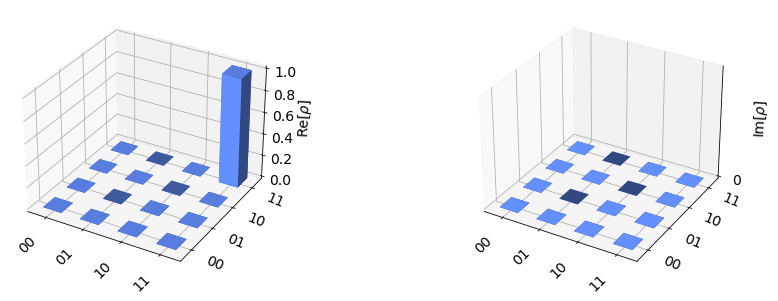

In [28]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city

# Use Aer's qasm_simulator
simulator = Aer.get_backend('statevector_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator)

# Grab results from the job
result = job.result()

# Returns 
outputstate = result.get_statevector(circuit, decimals=3)
counts = result.get_counts(circuit)
print(counts)
print(outputstate)

#print
plot_state_city(outputstate)

In [4]:
#Permite la ejecución ideal en "one-shot" del circuito y devuelve la matriz unitaria final del..UnitarySimulator 
#construye la matriz unitaria para un Qiskit QuantumCircuit aplicando cada matriz de puerta a una matriz de
#identidad. A diferencia de los 2 simuladores mencionados anteriormente, el circuito solo puede contener puertas,
#si contiene restablecimientos u operaciones de medición se generará una excepción.

import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city

Aer.backends()
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circuit, simulator).result()
unitary = result.get_unitary(circuit)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]
